In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
import models.ENet
model = models.ENet.ENet(13, 3).to(device=device)
# model_state_dict = torch.load("saved_models/ENet_93.pth")
# model.load_state_dict(model_state_dict)
# model.eval()

In [14]:
from dataloaders.NYU_loader import get_dataloaders
test_dl, train_dl = get_dataloaders(batch_size=1)

In [15]:
# Train the model
import utils.trainers.unet_train
import importlib
importlib.reload(utils.trainers.unet_train)

data = next(iter(train_dl))
dataloader = [data] 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss().to(device=device)

utils.trainers.unet_train.train_Unet(model, dataloader, optimizer, loss_func=loss_func, num_epochs=50)

Beginning training on Unet with 50 epochs...
Epoch 0
Epoch 0 loss: 2.5329067707061768
Epoch 1
Epoch 1 loss: 2.5179390907287598
Epoch 2
Epoch 2 loss: 2.4823896884918213
Epoch 3
Epoch 3 loss: 2.4650938510894775
Epoch 4
Epoch 4 loss: 2.4723520278930664
Epoch 5
Epoch 5 loss: 2.437821865081787
Epoch 6
Epoch 6 loss: 2.4528331756591797
Epoch 7
Epoch 7 loss: 2.4341416358947754
Epoch 8
Epoch 8 loss: 2.402859687805176
Epoch 9
Epoch 9 loss: 2.3891730308532715
Epoch 10
Epoch 10 loss: 2.343811511993408
Epoch 11
Epoch 11 loss: 2.3464064598083496
Epoch 12
Epoch 12 loss: 2.292985439300537
Epoch 13
Epoch 13 loss: 2.299387216567993
Epoch 14
Epoch 14 loss: 2.279928684234619
Epoch 15
Epoch 15 loss: 2.275637626647949
Epoch 16
Epoch 16 loss: 2.253786087036133
Epoch 17
Epoch 17 loss: 2.2236781120300293
Epoch 18
Epoch 18 loss: 2.263063907623291
Epoch 19
Epoch 19 loss: 2.1800241470336914
Epoch 20
Epoch 20 loss: 2.1944031715393066
Epoch 21
Epoch 21 loss: 2.1878886222839355
Epoch 22
Epoch 22 loss: 2.219030857086

[2.5329067707061768,
 2.5179390907287598,
 2.4823896884918213,
 2.4650938510894775,
 2.4723520278930664,
 2.437821865081787,
 2.4528331756591797,
 2.4341416358947754,
 2.402859687805176,
 2.3891730308532715,
 2.343811511993408,
 2.3464064598083496,
 2.292985439300537,
 2.299387216567993,
 2.279928684234619,
 2.275637626647949,
 2.253786087036133,
 2.2236781120300293,
 2.263063907623291,
 2.1800241470336914,
 2.1944031715393066,
 2.1878886222839355,
 2.2190308570861816,
 2.1590280532836914,
 2.1249794960021973,
 2.107609272003174,
 2.083287239074707,
 2.0540337562561035,
 2.1056737899780273,
 2.012789726257324,
 2.0461907386779785,
 2.0629422664642334,
 1.9909660816192627,
 1.9443644285202026,
 1.934739589691162,
 1.9305517673492432,
 1.9608668088912964,
 1.941781759262085,
 1.938385009765625,
 1.8908706903457642,
 1.890156865119934,
 1.8492718935012817,
 1.825057029724121,
 1.8435513973236084,
 1.8292819261550903,
 1.8057241439819336,
 1.826366901397705,
 1.7709500789642334,
 1.7638909

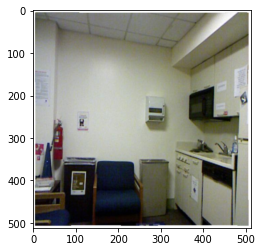

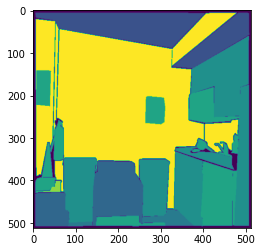

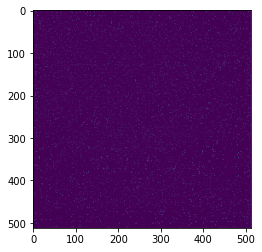

In [16]:
data = next(iter(train_dl))

N = 0

x = data[0].to(device=device).float()
y = data[1].to(device=device).float()[N]

pred = model(x) 

import matplotlib.pyplot as plt
import utils.utils as utils

plt.figure() 
plt.imshow(x[N].cpu().permute(1, 2, 0))
plt.figure()
plt.imshow(y.cpu().squeeze(0))
plt.figure()

pred_mask = utils.convert_to_segmentation(pred) 

plt.imshow(pred_mask[N].cpu())